In [1]:
%matplotlib inline
import numpy as np
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=7)
import matplotlib.pyplot as plt
import math 
import pandas as pd
from numpy import linalg as LA
from sympy import * 

In [2]:
# Scale function
def scale(vec_1):
    
    # Test
    v1_scale = np.square(np.linalg.norm(vec_1))
#     print(v1_scale)

    v1 = np.multiply(1/np.sqrt(v1_scale + 1e-15),vec_1)
#     print(v1)
    
    return list(v1)
    
    
def QR(span):
    
    # Setup arrays
    # Original Values
    vector = []
    # Normalized Values
    vec_norm = []

    # Size of array
    row,col = span.shape
    
    # First Column
    v1 = span[:,0]
    vec_1 = v1
    vector.append(vec_1)

    v1 = scale(vec_1)
    vec_norm.append(v1)
    
    # Subsequent Columns

    start = 1
    end = col

    for j in range(start,end):

        # Column
        projection = span[:,j]
        v = span[:,j]

        #Orthonormal vector
        for i in range(len(vec_norm)):
            #projection
            # dot
            proj_dot = np.dot(v,vec_norm[i])/(np.dot(vec_norm[i],vec_norm[i]) + 1e-15)
            proj = np.multiply(proj_dot,vec_norm[i])
            projection = projection - proj

        v_norm = scale(projection)

        vec_norm.append(v_norm)
        
    # Calculate R
    Q = vec_norm
    Q = np.array(Q)
    R = np.dot(Q,span)
    R = np.array(R)

    
    return Q.T,R

def eigenspace(span):
    
    eig_vec = np.eye(span.shape[0])
    X = span.copy()

    for _ in range(100):
        Q,R = QR(X)
        eig_vec = np.dot(eig_vec,Q)
        X = np.dot(R,Q)
        eig_val = np.diag(X)
        
    return eig_val,eig_vec, X


def CoV(df):
    
    # Shape of dataframe
    row,col = df.shape
    print(row,col)
    
    # Determine indices
#     if row > col:
#         row = col
#         col = row
    
    # Initialize Covariance matrix
    CoVar = np.zeros((col,col))
    
    # List of means
    stats = []
    for i in range(col):
        stats.append(df.iloc[:,i].mean())

    # Solve covariance matrix        
    for k in range(col):
        for i in range(col):
            var = 0
            for j in range(row):
                var = var + ((df.iloc[j,k] - stats[k])*(df.iloc[j,i] - stats[i]))/(row-1)
            CoVar[k][i] = var
        
    return CoVar
    
    

In [3]:

import numpy as np
angle = np.radians(30.)
x1 = np.random.normal(scale=8, size=100)
x2 = x1*np.tan(angle) + np.random.normal(scale=3, size=100)
x1 = x1-np.mean(x1)
x2 = x2-np.mean(x2)
data = np.array([x1,x2])

In [4]:

print(np.cov(data))

# [[61.57474678 33.59408493]
#  [33.59408493 24.50913429]]

[[67.425922  41.56248  ]
 [41.56248   35.9899834]]


In [5]:

rot = np.array([[np.cos(-angle), -np.sin(-angle)],
                [np.sin(-angle), np.cos(-angle)]])
data_rot = np.matmul(rot, data)

In [6]:
print("Variance in X: {:0.1f}".format(np.var(data_rot[0])))
print("Variance in Y: {:0.1f}".format(np.var(data_rot[1]))) 

# Variance in X: 81.4
# Variance in Y: 4.7

Variance in X: 94.6
Variance in Y: 7.8


In [7]:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data.T)
# print(pca.fit(data.T))
print(pca.components_.T)

# [[-0.8611 -0.5084]
#  [0.5084 -0.8611]]

[[-0.8227172 -0.5684509]
 [-0.5684509  0.8227172]]


In [8]:
print(pca.explained_variance_)
print(data.shape)

# [81.4119 4.6751]

[96.1432349  7.2726705]
(2, 100)


In [9]:
print(pca.explained_variance_[1])
eigenvalue_3sigma = 3 * np.sqrt(pca.explained_variance_[1]) 
eigenvalue_3sigma_arr = np.array([[-eigenvalue_3sigma, eigenvalue_3sigma]])
eigenvector = np.array([pca.components_[1]]).T
x_comp_1,y_comp_1 = np.dot(eigenvector, eigenvalue_3sigma_arr)
print(x_comp_1)
print(y_comp_1)


7.272670540040768
[ 4.598976 -4.598976]
[-6.656084  6.656084]


In [10]:
eigenvalue_3sigma = 3 * np.sqrt(pca.explained_variance_[0]) 
eigenvalue_3sigma_arr = np.array([[-eigenvalue_3sigma, eigenvalue_3sigma]])
eigenvector = np.array([pca.components_[0]]).T
x_comp_2,y_comp_2 = np.dot(eigenvector, eigenvalue_3sigma_arr)
print(x_comp_2)
print(y_comp_2)
print(np.linalg.norm(eigenvector))

[ 24.2008826 -24.2008826]
[ 16.7214352 -16.7214352]
0.9999999999999999


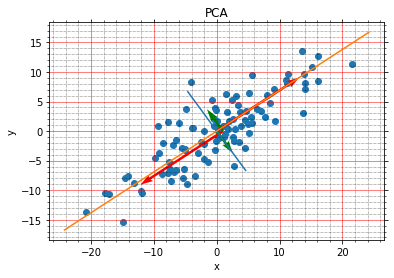

In [11]:
plt.scatter(data[0,:],data[1,:])
plt.plot(x_comp_1,y_comp_1)
plt.plot(x_comp_2,y_comp_2)
plt.quiver(x_comp_2,y_comp_2, scale = 100, angles='xy', color='red')
plt.quiver(x_comp_1,y_comp_1, scale = 100, angles='xy', color='Green')

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
# giving a title  
plt.title('PCA') 
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Turn off the display of all ticks.
plt.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

plt.show()

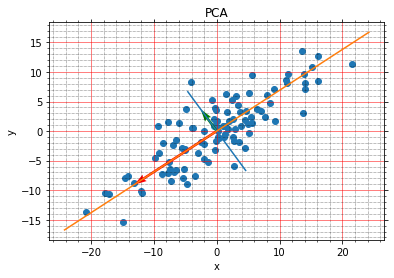

In [12]:
plt.scatter(data[0,:],data[1,:])
plt.plot(x_comp_1,y_comp_1)
plt.plot(x_comp_2,y_comp_2)
plt.quiver(x_comp_2[1],y_comp_2[1], scale = 100, angles='xy', color='red')
plt.quiver(x_comp_1[1],y_comp_1[1], scale = 100, angles='xy', color='Green')

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
# giving a title  
plt.title('PCA') 
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Turn off the display of all ticks.
plt.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

plt.show()

In [13]:
np.dot(x_comp_1,y_comp_1.T)

-61.222341361990345